In [238]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [239]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)
    
    #Generate the elbow plot
    fig = plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

Data with knowledge

In [240]:
data = pd.read_csv('../data/03_Processed/02_ProcessedData.csv')
data_mapped = data.copy()
data_mapped['Participation'] = data_mapped['Participation'].map({'Project':0.0,'Project+organization':1.0 })

c:\Users\Bartosz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Bartosz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Bartosz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Bartosz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

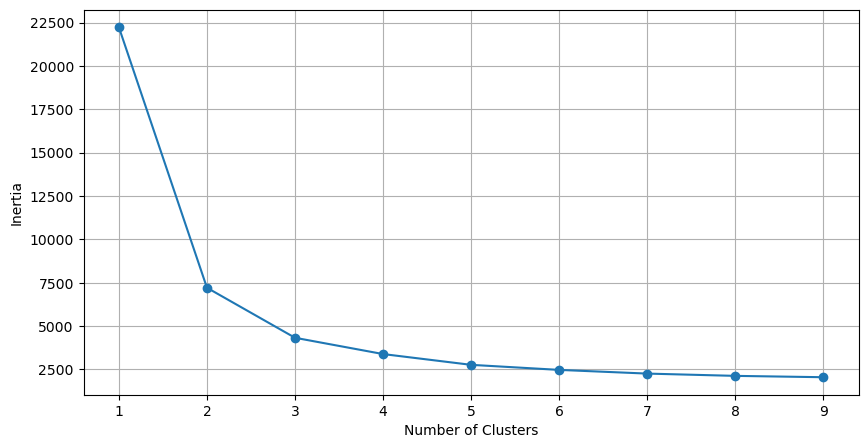

In [241]:
optimise_k_means(data_mapped, 10)



In [242]:
kmeans = KMeans(n_clusters=3)

In [243]:
kmeans.fit(data_mapped)

c:\Users\Bartosz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Bartosz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [244]:
data_mapped['kmeans_3'] = kmeans.labels_

In [245]:
data_mapped_cluster_assignment = data_mapped.groupby('kmeans_3').apply(lambda x: list(x.index)).to_dict()

print("\nPrzypisanie obiektów do klastrów:")
for cluster, members in data_mapped_cluster_assignment.items():
    print(f"Klaster {cluster}: {members}")



Przypisanie obiektów do klastrów:
Klaster 0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
Klaster 1: [37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58]
Klaster 2: [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


Data without knowledge

In [246]:
datawithoutknowledge = pd.read_csv('../data/03_Processed/02_ProcessedDataWithoutIndustryKnowledge.csv')
datawithoutknowledge_mapped = datawithoutknowledge.copy()
datawithoutknowledge_mapped['Participation'] = datawithoutknowledge_mapped['Participation'].map({'Project':0.0,'Project+organization':1.0 })

c:\Users\Bartosz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Bartosz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Bartosz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Bartosz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

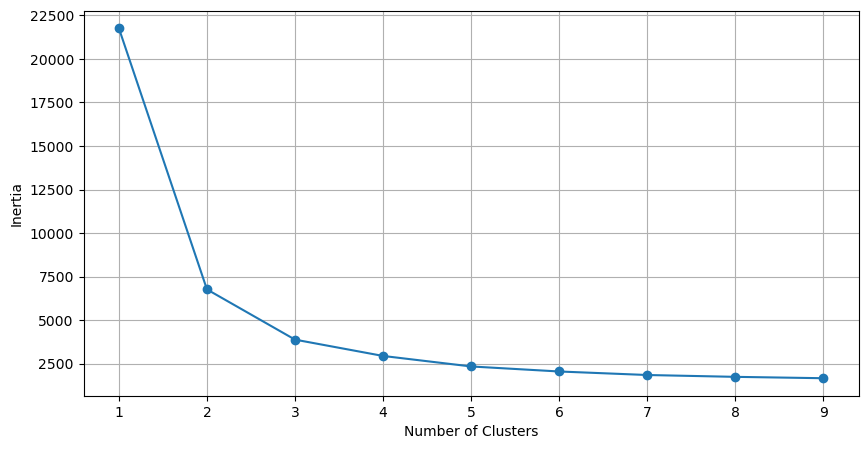

In [247]:
optimise_k_means(datawithoutknowledge_mapped, 10)

In [248]:
kmeans_without = KMeans(n_clusters=3)

In [249]:
kmeans.fit(datawithoutknowledge_mapped)

c:\Users\Bartosz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Bartosz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [250]:
datawithoutknowledge_mapped['kmeans_3'] = kmeans.labels_

In [251]:
datawithoutknowledge_mapped_cluster_assignment = datawithoutknowledge_mapped.groupby('kmeans_3').apply(lambda x: list(x.index)).to_dict()

print("\nPrzypisanie obiektów do klastrów:")
for cluster, members in datawithoutknowledge_mapped_cluster_assignment.items():
    print(f"Klaster {cluster}: {members}")



Przypisanie obiektów do klastrów:
Klaster 0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
Klaster 1: [38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58]
Klaster 2: [19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]
